**NAME**: KAMRAN ANSARI

**REG NO**: 22MCA0223



# Question 1

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget https://github.com/Horea94/Fruit-Images-Dataset/archive/refs/heads/master.zip

--2023-08-05 09:50:05--  https://github.com/Horea94/Fruit-Images-Dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master [following]
--2023-08-05 09:50:05--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [             <=>    ] 761.30M  14.2MB/s    in 59s     

2023-08-05 09:51:05 (12.8 MB/s) - ‘master.zip’ saved [798281939]



In [ ]:
!unzip master.zip

In [ ]:
!mkdir fruit
!mv Fruit-Images-Dataset-master/Training fruit/train
!mv Fruit-Images-Dataset-master/Test fruit/val

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/fruit/train',
        target_size=(299, 299),
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/content/fruit/val',
        target_size=(299, 299),
        class_mode='categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
model = tf.keras.applications.InceptionV3(weights = "imagenet", include_top=False, input_shape = (299, 299, 3))

x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)

predictions = tf.keras.layers.Dense(131, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model_history = model.fit(
train_generator,
epochs=3,
validation_data = validation_generator,
batch_size=128)

Epoch 1/2
2116/2116 [==============================] - 1041s 492ms/step - loss: 1.1801 - accuracy: 0.6961 - val_loss: 1.1097 - val_accuracy: 0.7483
Epoch 2/2
2116/2116 [==============================] - 1035s 489ms/step - loss: 0.0910 - accuracy: 0.9733 - val_loss: 0.2709 - val_accuracy: 0.9458


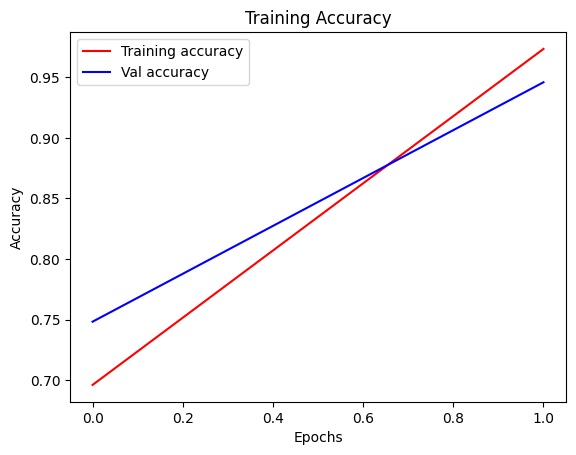

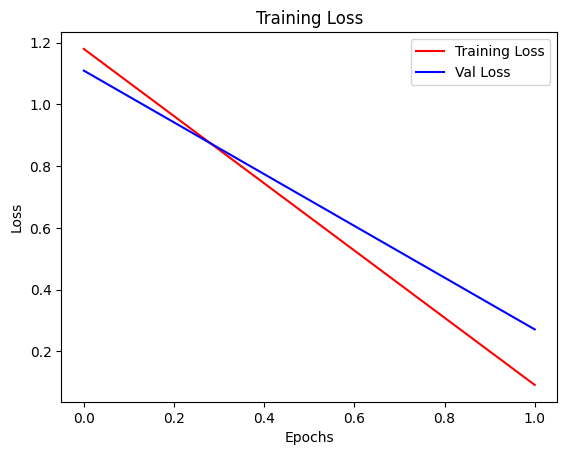

In [ ]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Question 2

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/fruit/train',
        target_size=(299, 299),
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/content/fruit/val',
        target_size=(299, 299),
        class_mode='categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
model = tf.keras.applications.InceptionV3(weights = "imagenet", include_top=False, input_shape = (299, 299, 3))

x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(131, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model_history = model.fit(
train_generator,
epochs = 2,
validation_data = validation_generator,
batch_size=128)

Epoch 1/2
2116/2116 [==============================] - 2231s 1s/step - loss: 2.7734 - accuracy: 0.3221 - val_loss: 3.4030 - val_accuracy: 0.4083
Epoch 2/2
2116/2116 [==============================] - 2076s 981ms/step - loss: 0.5247 - accuracy: 0.8242 - val_loss: 0.5785 - val_accuracy: 0.8313


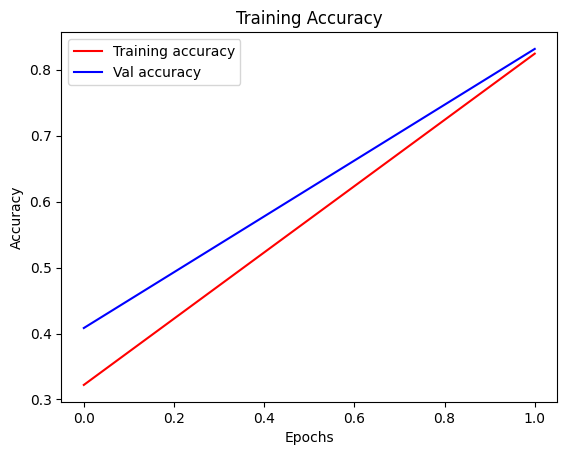

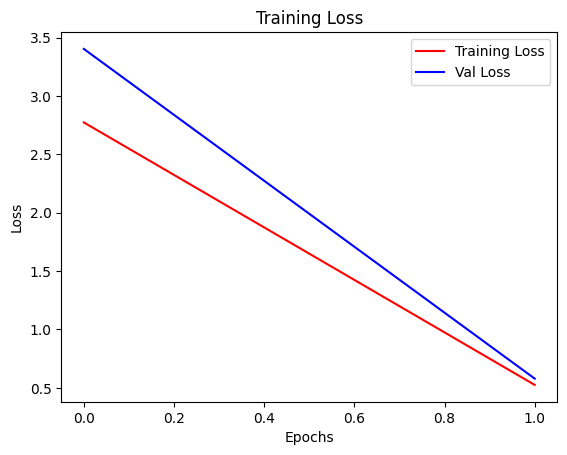

In [ ]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()